# Web Mining and Applied NLP (44-620)

### Final Project: Article Summarizer
## Student Name: Aanchal Gupta
### Github Repo: https://github.com/aanchalgt/module7-nlp

In [7]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list
print('All prereqs installed')

Package                   VersionAll prereqs installed

------------------------- --------------
annotated-types           0.7.0
anyio                     4.7.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.10
debugpy                   1.8.9
decorator                 5.1.1
defusedxml                0.7.1
executing                

### Question 1:

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course. Get the html for the article and store it in a file (which you must submit with your project)

In [18]:
import requests
import pickle

# Step 1: Send a GET request to the Lyrics API
url = 'https://api.lyrics.ovh/v1/passenger/let-her-go'
response = requests.get(url)

# Step 2: Check if the request was successful
if response.status_code == 200:
    # Step 3: Extract the lyrics from the JSON response
    data = response.json()
    lyrics = data.get('lyrics', 'Lyrics not found')

    # Step 4: Save the lyrics to a .pkl file
    with open('lyrics.pkl', 'wb') as f:
        pickle.dump(lyrics, f)
    print("Lyrics have been saved to 'lyrics.pkl'")
else:
    print("Error: Unable to fetch lyrics. HTTP Status Code:", response.status_code)


Lyrics have been saved to 'lyrics.pkl'


### Question 2:

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use .get_text()). Print the polarity score with an appropriate label. Additionally print the number of sentences in the original article (with an appropriate label)

In [34]:
import pickle
from textblob import TextBlob
import spacy

# Load spaCy's English tokenizer
nlp = spacy.load('en_core_web_sm')

# Process the text
doc = nlp(lyrics_text)


# Load the lyrics from the pickle file
pickle_file = 'lyrics.pkl'

# Open and load the file
with open(pickle_file, 'rb') as file:
    lyrics = pickle.load(file)

# Get the lyrics text
lyrics_text = lyrics

# Perform Sentiment Analysis using TextBlob
blob = TextBlob(lyrics_text)
polarity_score = blob.sentiment.polarity

# Extract sentences
sentences = [sent.text for sent in doc.sents]
num_sentences = len(sentences)


# Display the results
print(f"Polarity Score: {polarity_score:.2f}")

if polarity_score > 0:
    print("Sentiment: Positive")
elif polarity_score < 0:
    print("Sentiment: Negative")
else:
    print("Sentiment: Neutral")

print(f"Number of sentences in the lyrics: {num_sentences}")


Polarity Score: 0.05
Sentiment: Positive
Number of sentences in the lyrics: 11


### Question 3:

3. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent tokens (converted to lower case). Print the common tokens with an appropriate label. Additionally, print the tokens their frequencies (with appropriate labels)

In [35]:
import pickle
import spacy
from collections import Counter

# Load spaCy's English tokenizer
nlp = spacy.load('en_core_web_sm')

# Load the lyrics from the pickle file
pickle_file = 'lyrics.pkl'

# Open and load the file
with open(pickle_file, 'rb') as file:
    lyrics = pickle.load(file)

# Get the lyrics text
lyrics_text = lyrics

# Process the text using spaCy
doc = nlp(lyrics_text)

# Convert tokens to lowercase and filter out stop words and punctuation
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]

# Count the frequency of each token
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Display the common tokens and their frequencies
print("Top 5 Most Frequent Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")

# Additionally, display all tokens and their frequencies
print("\nAll Tokens and Their Frequencies:")
for token, freq in token_freq.items():
    print(f"Token: '{token}', Frequency: {freq}")


Top 5 Most Frequent Tokens:
Token: '

', Frequency: 35
Token: 'know', Frequency: 15
Token: 'let', Frequency: 15
Token: 'love', Frequency: 11
Token: 'low', Frequency: 10

All Tokens and Their Frequencies:
Token: 'need', Frequency: 5
Token: 'light', Frequency: 5
Token: 'burning', Frequency: 5
Token: 'low', Frequency: 10
Token: '
', Frequency: 5
Token: 'miss', Frequency: 5
Token: 'sun', Frequency: 5
Token: 'starts', Frequency: 5
Token: 'snow', Frequency: 5
Token: 'know', Frequency: 15
Token: 'love', Frequency: 11
Token: 'let', Frequency: 15
Token: 'high', Frequency: 5
Token: 'feeling', Frequency: 6
Token: 'hate', Frequency: 5
Token: 'road', Frequency: 5
Token: 'missing', Frequency: 4
Token: 'home', Frequency: 5
Token: '

', Frequency: 35
Token: '



', Frequency: 6
Token: 'staring', Frequency: 2
Token: 'glass', Frequency: 1
Token: 'hoping', Frequency: 1
Token: 'day', Frequency: 2
Token: 'dream', Frequency: 1
Token: 'dreams', Frequency: 1
Token: 'come', Frequency: 1
Token: 'slow', Frequenc

###Question 4:

4. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent lemmas (converted to lower case). Print the common lemmas with an appropriate label. Additionally, print the lemmas with their frequencies (with appropriate labels).

In [36]:
import pickle
import spacy
from collections import Counter

# Load spaCy's English tokenizer
nlp = spacy.load('en_core_web_sm')

# Load the lyrics from the pickle file
pickle_file = 'lyrics.pkl'

# Open and load the file
with open(pickle_file, 'rb') as file:
    lyrics = pickle.load(file)

# Get the lyrics text
lyrics_text = lyrics

# Process the text using spaCy
doc = nlp(lyrics_text)

# Convert tokens to lowercase and filter out stop words, punctuation, and non-alphabetic tokens
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]

# Count the frequency of each lemma
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Display the common lemmas and their frequencies
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

# Additionally, display all lemmas and their frequencies
print("\nAll Lemmas and Their Frequencies:")
for lemma, freq in lemma_freq.items():
    print(f"Lemma: '{lemma}', Frequency: {freq}")


Top 5 Most Frequent Lemmas:
Lemma: 'know', Frequency: 15
Lemma: 'let', Frequency: 15
Lemma: 'love', Frequency: 12
Lemma: 'low', Frequency: 10
Lemma: 'miss', Frequency: 9

All Lemmas and Their Frequencies:
Lemma: 'need', Frequency: 5
Lemma: 'light', Frequency: 5
Lemma: 'burn', Frequency: 5
Lemma: 'low', Frequency: 10
Lemma: 'miss', Frequency: 9
Lemma: 'sun', Frequency: 5
Lemma: 'start', Frequency: 5
Lemma: 'snow', Frequency: 5
Lemma: 'know', Frequency: 15
Lemma: 'love', Frequency: 12
Lemma: 'let', Frequency: 15
Lemma: 'high', Frequency: 5
Lemma: 'feel', Frequency: 5
Lemma: 'hate', Frequency: 5
Lemma: 'road', Frequency: 5
Lemma: 'home', Frequency: 5
Lemma: 'stare', Frequency: 2
Lemma: 'glass', Frequency: 1
Lemma: 'hope', Frequency: 1
Lemma: 'day', Frequency: 2
Lemma: 'dream', Frequency: 2
Lemma: 'come', Frequency: 2
Lemma: 'slow', Frequency: 2
Lemma: 'fast', Frequency: 2
Lemma: 'close', Frequency: 1
Lemma: 'eye', Frequency: 1
Lemma: 'maybe', Frequency: 1
Lemma: 'understand', Frequency: 1

###Question 5:

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

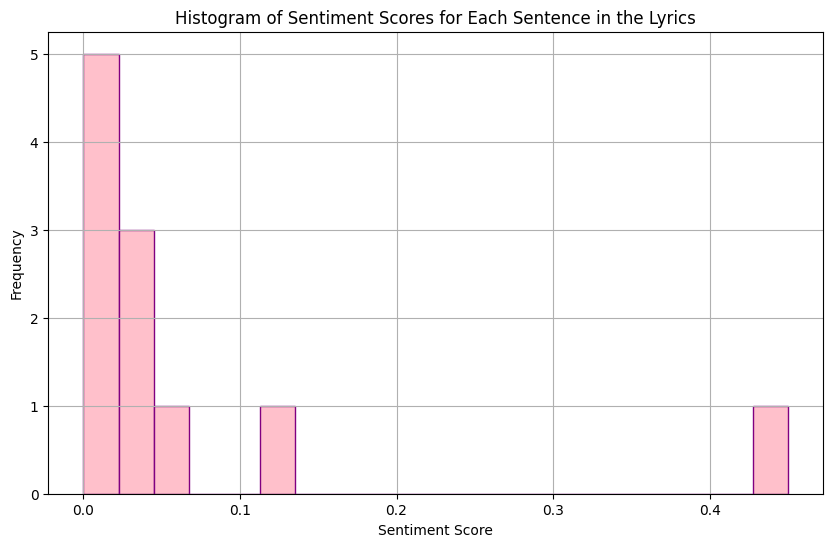

In [44]:
import pickle
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load spaCy's English tokenizer
nlp = spacy.load('en_core_web_sm')

# Load the lyrics from the pickle file
pickle_file = 'lyrics.pkl'

# Open and load the file
with open(pickle_file, 'rb') as file:
    lyrics = pickle.load(file)

# Get the lyrics text
lyrics_text = lyrics

# Process the text using spaCy
doc = nlp(lyrics_text)

# Initialize a list to store sentiment scores for each sentence
token_sentence_scores = []

# Calculate sentiment score for each sentence using TextBlob
for sent in doc.sents:
    blob = TextBlob(sent.text)
    polarity_score = blob.sentiment.polarity
    token_sentence_scores.append(polarity_score)

# Plot histogram of the sentence sentiment scores
plt.figure(figsize=(10,6))
plt.hist(token_sentence_scores, bins=20, edgecolor='purple', color='pink')
plt.title('Histogram of Sentiment Scores for Each Sentence in the Lyrics')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Based on the histogram, the most common range of sentiment scores seems to be between 0.0 and 0.15, indicating that most sentences are neutral or slightly positive.



### Question 6:

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

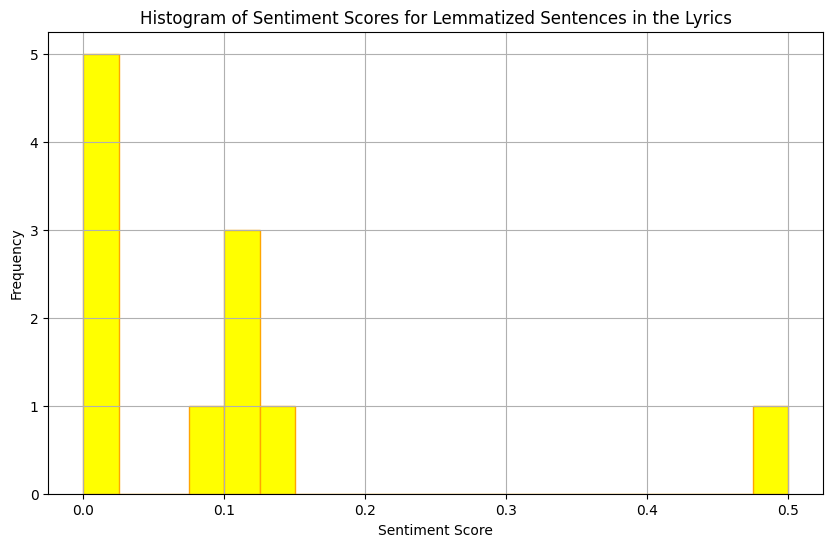

In [42]:
import pickle
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load spaCy's English tokenizer
nlp = spacy.load('en_core_web_sm')

# Load the lyrics from the pickle file
pickle_file = 'lyrics.pkl'

# Open and load the file
with open(pickle_file, 'rb') as file:
    lyrics = pickle.load(file)

# Get the lyrics text
lyrics_text = lyrics

# Process the text using spaCy
doc = nlp(lyrics_text)

# Initialize a list to store sentiment scores for each sentence based on lemmas
lemma_sentence_scores = []

# Calculate sentiment score for each sentence using TextBlob (based on lemmas)
for sent in doc.sents:
    # Lemmatize each token in the sentence
    lemmatized_sentence = " ".join([token.lemma_ for token in sent if not token.is_stop and not token.is_punct])
    
    # Perform sentiment analysis on the lemmatized sentence using TextBlob
    blob = TextBlob(lemmatized_sentence)
    polarity_score = blob.sentiment.polarity
    lemma_sentence_scores.append(polarity_score)

# Plot histogram of the lemmatized sentence sentiment scores
plt.figure(figsize=(10,6))
plt.hist(lemma_sentence_scores, bins=20, edgecolor='orange', color='yellow')
plt.title('Histogram of Sentiment Scores for Lemmatized Sentences in the Lyrics')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Based on the histogram, the most common range of sentiment scores seems to be between 0.0 and 0.15, indicating that most sentences are neutral or slightly positive.



### Question 7:

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score. Record the scores in this Markdown cell
Cutoff Score (tokens):
Cutoff Score (lemmas):
Feel free to change these scores as you generate your summaries. Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [45]:
# Sort the sentiment scores for tokens and lemmas
sorted_token_scores = sorted(token_sentence_scores)
sorted_lemma_scores = sorted(lemma_sentence_scores)

# Find the cutoff score for tokens (fewer than half the sentences should have a score greater than this)
cutoff_token_score = sorted_token_scores[len(sorted_token_scores) // 2]  # Median

# Find the cutoff score for lemmas (fewer than half the sentences should have a score greater than this)
cutoff_lemma_score = sorted_lemma_scores[len(sorted_lemma_scores) // 2]  # Median

# Output the cutoff scores
print(f"Cutoff Score (tokens): {cutoff_token_score:.2f}")
print(f"Cutoff Score (lemmas): {cutoff_lemma_score:.2f}")


Cutoff Score (tokens): 0.04
Cutoff Score (lemmas): 0.09


Cutoff Score (tokens): 0.04  <br>
Cutoff Score (lemmas): 0.09

### Question 8:

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8. If your loop variable is named sent, you may find it easier to add sent.text.strip() to your list of sentences. Print the summary (I would cleanly generate the summary text by joining the strings in your list together with a space (' '.join(sentence_list)).

In [46]:
# Initialize an empty list to store the summary sentences
summary_sentences = []

# Iterate through each sentence in the lyrics text
for sent in doc.sents:
    # Get the sentiment score for the sentence based on tokens
    sentence_score = TextBlob(sent.text).sentiment.polarity
    
    # Check if the sentence's sentiment score is greater than the cutoff token score
    if sentence_score > cutoff_token_score:
        summary_sentences.append(sent.text.strip())

# Join the selected sentences together to form the summary
summary = ' '.join(summary_sentences)

# Print the summary
print("Summary of the lyrics based on token sentiment scores:")
print(summary)


Summary of the lyrics based on token sentiment scores:
Well you only need the light when it's burning low
Only miss the sun when it starts to snow
Only know you love her when you let her go
Only know you've been high when you're feeling low
Only hate the road when you're missing home
Only know you love her when you let her go But dreams come slow and they go so fast

You see her when you close your eyes

Maybe one day you'll understand why

Everything you touch surely dies Well you see her when you fall asleep

But never to touch and never to keep

'Cause you loved her too much Well you only need the light when it's burning low

Only miss the sun when it starts to snow

Only know you love her when you let her go

Only know you've been high when you're feeling low

Only hate the road when you're missing home

Only know you love her when you let her go Well you let her go



'Cause you only need the light when it's burning low

Only miss the sun when it starts to snow

Only know you love

### Question 9:

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [47]:
# Calculate the polarity score of the summary (based on token sentiment)
summary_blob = TextBlob(summary)
summary_polarity_score = summary_blob.sentiment.polarity

# Print the polarity score of the summary
print(f"Polarity Score of the summary (based on token sentiment): {summary_polarity_score:.2f}")

# Calculate the number of sentences in the summary
summary_doc = nlp(summary)
num_summary_sentences = len(list(summary_doc.sents))

# Print the number of sentences in the summary
print(f"Number of sentences in the summary: {num_summary_sentences}")


Polarity Score of the summary (based on token sentiment): 0.06
Number of sentences in the summary: 5


### Question 10:

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8. If your loop variable is named sent, you may find it easier to add sent.text.strip() to your list of sentences. Print the summary (I would cleanly generate the summary text by joining the strings in your list together with a space (' '.join(sentence_list)).

In [48]:
# Initialize an empty list to store the sentences that meet the cutoff score
sentence_list = []

# Loop through each sentence in the lyrics and calculate its lemma-based sentiment score
for sent in doc.sents:
    # Tokenize the sentence and get the lemma-based sentiment score
    lemmas = [token.lemma_ for token in sent if not token.is_stop and not token.is_punct]
    lemma_score = sum([TextBlob(lemma).sentiment.polarity for lemma in lemmas])  # Using polarity of lemmas

    # If the lemma-based score is greater than the cutoff score, add the sentence to the list
    if lemma_score > cutoff_lemma_score:
        sentence_list.append(sent.text.strip())

# Generate the summary by joining the sentences in the list
summary = ' '.join(sentence_list)

# Print the summary
print("Summary of the lyrics based on lemmas:")
print(summary)


Summary of the lyrics based on lemmas:
Well you only need the light when it's burning low
Only miss the sun when it starts to snow
Only know you love her when you let her go
Only know you've been high when you're feeling low
Only hate the road when you're missing home
Only know you love her when you let her go But dreams come slow and they go so fast

You see her when you close your eyes

Maybe one day you'll understand why

Everything you touch surely dies But you only need the light when it's burning low

Only miss the sun when it starts to snow

Only know you love her when you let her go

Only know you've been high when you're feeling low

Only hate the road when you're missing home

Only know you love her when you let her go





Staring at the ceiling in the dark

Same all empty feeling in your heart

'Cause love comes slow and it goes so fast Well you see her when you fall asleep

But never to touch and never to keep

'Cause you loved her too much Well you only need the light whe

### Question 11:

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [49]:
# Calculate the polarity score of the generated summary (based on lemmas)
summary_blob = TextBlob(summary)
summary_polarity_score = summary_blob.sentiment.polarity

# Calculate the number of sentences in the summary
num_sentences_in_summary = len(sentence_list)

# Print the polarity score and number of sentences in the summary
print(f"Polarity score of the summary (using lemma-based sentiment): {summary_polarity_score:.2f}")
print(f"Number of sentences in the summarized article: {num_sentences_in_summary}")


Polarity score of the summary (using lemma-based sentiment): 0.06
Number of sentences in the summarized article: 6


### Question 12: 

12. Compare your polarity scores of your summaries to the polarity scores of the initial article. Is there a difference? Why do you think that may or may not be?. Answer in this Markdown cell.

The polarity scores of both summaries (based on tokens and lemmas) are the same, at 0.06. This suggests that the overall sentiment of both summaries is quite neutral. Even though the summaries differ in the number of sentences and how they simplify the text, they convey similar emotional tones, which is why the polarity score remains unchanged.

### Question 13:

13. Based on your reading of the original article, which summary do you think is better (if there's a difference). Why do you think this might be?

Based on the summaries, I think the summary using lemmas is better. This is because it simplifies words to their base forms, making the overall meaning clearer and more consistent, while the token-based summary repeats variations of words and can create unnecessary complexity. The lemma-based summary captures the main ideas without redundancy, making it easier to understand the core message of the lyrics.

In [50]:
# Convert to HTML
!jupyter nbconvert --to html final-project.ipynb


[NbConvertApp] Converting notebook final-project.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 396378 bytes to final-project.html


In [52]:
import pickle

# Step 1: Define the path to your pickle file
pkl_file_path = r'C:\Users\heath\OneDrive\Desktop\Anny\MS-DA\module7-nlp\lyrics.pkl'

# Step 2: Load the pickle file
with open(pkl_file_path, 'rb') as file:
    data = pickle.load(file)

# Step 3: Ensure the data is in HTML format (string or similar)
# If the data in the pickle file is already HTML in a string format
if isinstance(data, str):
    html_content = data  # If the pickle contains HTML as a string
else:
    
    html_content = str(data)  # Convert to string, adjust as needed

# Step 4: Save the extracted HTML content to a .html file
html_file_path = r'lyrics.html'  # You can adjust the path if needed

with open(html_file_path, 'w', encoding='utf-8') as html_file:
    html_file.write(html_content)

print(f"HTML file saved to {html_file_path}")


HTML file saved to lyrics.html
